In [352]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split, Dataset, DataLoader, ConcatDataset
from torchvision import transforms, models
from torch.optim.lr_scheduler import StepLR
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score , confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import cv2
import sys
import random

reading & preprocessing data shapes 

In [353]:
tumor = []
no_tumor = []

for i in glob.iglob('./data/brain_tumor_dataset/yes/*.jpg'):
    img = cv2.imread(i)
    img = cv2.resize(img, (128,128))
    b , g , r =cv2.split(img)
    img = cv2.merge([r, g , b])
    tumor.append(img)

In [354]:
for i in glob.iglob('./data/brain_tumor_dataset/no/*.jpg'):
    img = cv2.imread(i)
    img = cv2.resize(img, (128,128))
    b , g , r =cv2.split(img)
    img = cv2.merge([r, g , b])
    no_tumor.append(img)

In [355]:
for img in tumor:
    print(img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [356]:
for img in no_tumor:
    print(img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [357]:
no_tumor = np.array(no_tumor)
tumor = np.array(tumor)


In [358]:
tumor.shape

(154, 128, 128, 3)

In [359]:
no_tumor.shape

(91, 128, 128, 3)

In [360]:
all_data = np.concatenate((tumor,no_tumor))

In [361]:
all_data.shape

(245, 128, 128, 3)

In [362]:
np.random.choice(10, 5, replace=False)

array([6, 4, 3, 2, 1])

In [363]:
def plot_random(no_tumor, tumor, num=10):
    no_tumor_imgs = no_tumor[np.random.choice(no_tumor.shape[0], num, replace=False)]
    tumor_imgs = tumor[np.random.choice(tumor.shape[0], num, replace=False)]
    
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('No Tumor')
        plt.imshow(no_tumor_imgs[i])
        
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Tumor')
        plt.imshow(tumor_imgs[i])

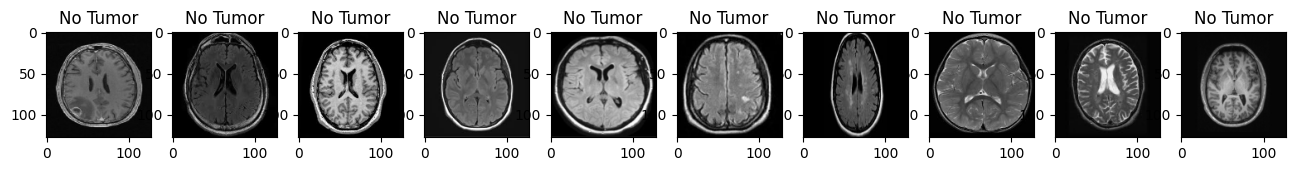

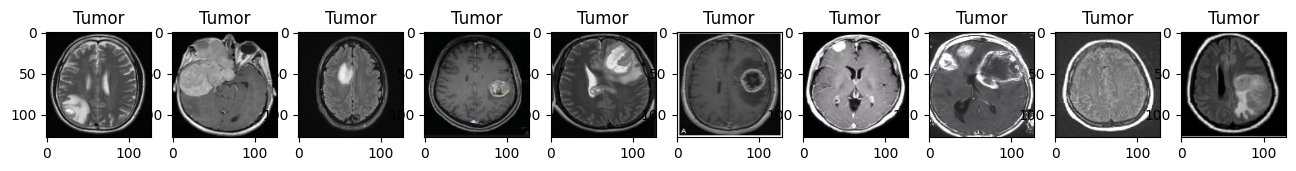

In [364]:
plot_random(no_tumor, tumor)

In [365]:
class Dataset(object):
    """An abstract class representing a Dataset.

    All other datasets should subclass it. All subclasses should override
    ``__len__``, that provides the size of the dataset, and ``__getitem__``,
    supporting integer indexing in range from 0 to len(self) exclusive.
    """

    def __getitem__(self, index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

    def __add__(self, other):
        return ConcatDataset([self, other])

In [379]:
class MRI(Dataset):
    def __init__(self):
        tumor = []
        no_tumor = []
        
        for f in glob.iglob("./data/brain_tumor_dataset/yes/*.jpg"):
            img = cv2.imread(f)
            img = cv2.resize(img, (128,128)) 
            b, g, r = cv2.split(img)
            img = cv2.merge([r, g, b])  # Ensure RGB
            img = np.transpose(img, (2, 0, 1))  # Change to C, H, W format
            tumor.append(img)
            
        for f in glob.iglob("./data/brain_tumor_dataset/no/*.jpg"):
            img = cv2.imread(f)
            img = cv2.resize(img, (128,128)) 
            b, g, r = cv2.split(img)
            img = cv2.merge([r, g, b])
            img = np.transpose(img, (2, 0, 1))
            no_tumor.append(img)

        tumor = np.array(tumor, dtype=np.float32)
        no_tumor = np.array(no_tumor, dtype=np.float32)

        tumor_label = np.ones(tumor.shape[0], dtype=np.float32)
        no_tumor_label = np.zeros(no_tumor.shape[0], dtype=np.float32)

        self.images = np.concatenate((tumor, no_tumor), axis=0)
        self.labels = np.concatenate((tumor_label, no_tumor_label))

        self.normalize()

    def __len__(self):
        return self.images.shape[0]

    def __getitem__(self, index):
        sample = {'image': self.images[index], 'label': self.labels[index]}
        return sample
    
    def normalize(self):
        self.images = self.images / 255.0  # Normalize the images to [0, 1]


In [380]:
mri_dataset = MRI()

train_size = int(0.8 * len(mri_dataset))
val_size = len(mri_dataset) - train_size

train_dataset, val_dataset = random_split(mri_dataset, [train_size, val_size])

# Create DataLoader instances
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

MODEL:

In [381]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.cnn_model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=5),
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=5))
        
        self.fc_model = nn.Sequential(
        nn.Linear(in_features=256, out_features=120),
        nn.Tanh(),
        nn.Linear(in_features=120, out_features=84),
        nn.Tanh(),
        nn.Linear(in_features=84, out_features=1))
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        x = F.sigmoid(x)
        
        return x

In [382]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)

criterion = nn.BCELoss()  # Binary Cross-Entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)  # Learning rate scheduler

In [383]:
epochs = 50
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for D in train_loader:
        images = D['image'].to(device)
        labels = D['label'].to(device).float()

        optimizer.zero_grad()
        outputs = model(images).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted = (outputs >= 0.5).float()  # Binary threshold for predictions
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    # Compute training loss and accuracy
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct_predictions / total_samples
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation step
    model.eval()
    val_loss = 0.0
    correct_val_predictions = 0
    total_val_samples = 0

    with torch.no_grad():
        for D in val_loader:  # Assuming a validation loader
            images = D['image'].to(device)
            labels = D['label'].to(device).float()

            outputs = model(images).squeeze()
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            predicted = (outputs >= 0.5).float()
            correct_val_predictions += (predicted == labels).sum().item()
            total_val_samples += labels.size(0)

    val_loss /= len(val_loader)
    val_accuracy = correct_val_predictions / total_val_samples
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")


Epoch 1/50, Train Loss: 0.7031, Train Accuracy: 0.5765, Validation Loss: 0.5973, Validation Accuracy: 0.7347
Epoch 2/50, Train Loss: 0.6342, Train Accuracy: 0.6020, Validation Loss: 0.6204, Validation Accuracy: 0.7347
Epoch 3/50, Train Loss: 0.6188, Train Accuracy: 0.6122, Validation Loss: 0.5963, Validation Accuracy: 0.7347
Epoch 4/50, Train Loss: 0.5893, Train Accuracy: 0.6684, Validation Loss: 0.6437, Validation Accuracy: 0.6939
Epoch 5/50, Train Loss: 0.5636, Train Accuracy: 0.7092, Validation Loss: 0.6963, Validation Accuracy: 0.6939
Epoch 6/50, Train Loss: 0.4897, Train Accuracy: 0.7296, Validation Loss: 0.7365, Validation Accuracy: 0.6939
Epoch 7/50, Train Loss: 0.5480, Train Accuracy: 0.7755, Validation Loss: 0.7713, Validation Accuracy: 0.6531
Epoch 8/50, Train Loss: 0.5941, Train Accuracy: 0.7500, Validation Loss: 0.6975, Validation Accuracy: 0.6939
Epoch 9/50, Train Loss: 0.5000, Train Accuracy: 0.7908, Validation Loss: 0.6851, Validation Accuracy: 0.6735
Epoch 10/50, Train 

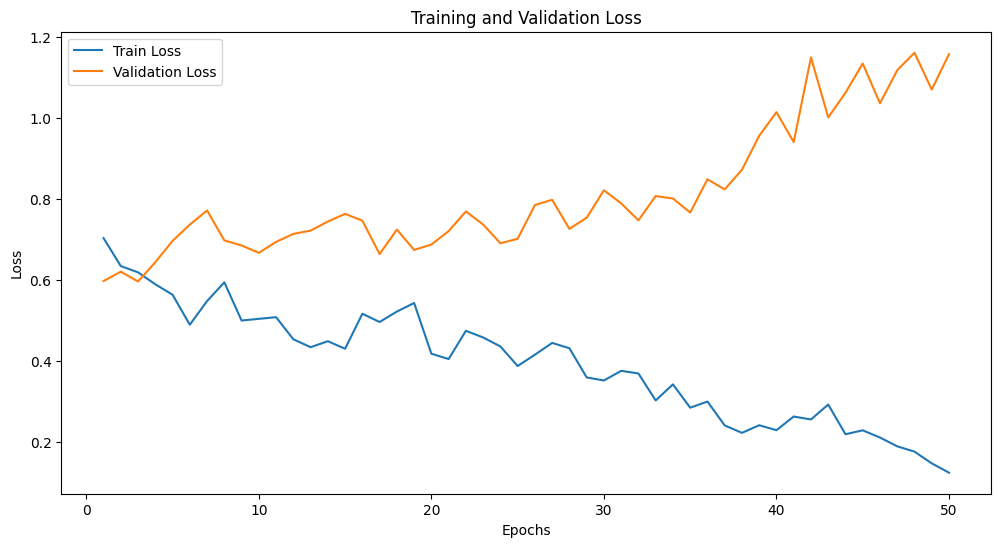

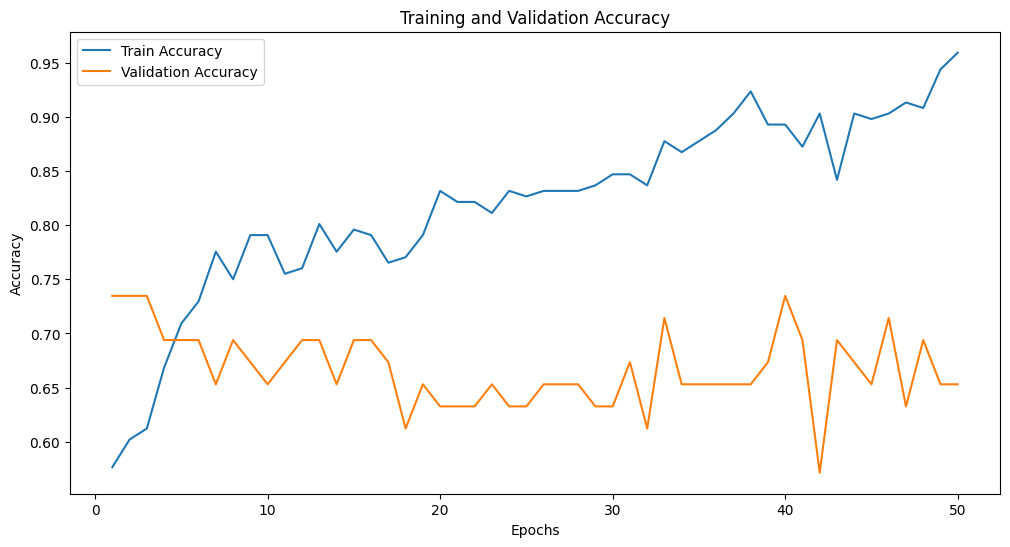

In [384]:
# Plot Loss
plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs + 1), train_losses, label="Train Loss")
plt.plot(range(1, epochs + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs + 1), train_accuracies, label="Train Accuracy")
plt.plot(range(1, epochs + 1), val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()


In [385]:
model.eval()
outputs = []
y_true = []

with torch.no_grad():
    for D in train_loader:
        image = D['image'].to(device)
        label = D['label'].to(device)

        y_hat = model(image)

        # Collect the outputs and labels
        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())

# Flatten the list of outputs and labels
outputs = np.concatenate(outputs)
y_true = np.concatenate(y_true)

# Calculate the predictions by applying a threshold (0.5 for binary classification)
predictions = (outputs >= 0.5).astype(np.float32)

# Calculate accuracy
accuracy = accuracy_score(y_true, predictions)
print(f"Validation Accuracy: {accuracy:.4f}")

# Optionally save the model
torch.save(model.state_dict(), 'brain_tumor_model.pth')
print("Model saved successfully!")


Validation Accuracy: 0.9490
Model saved successfully!


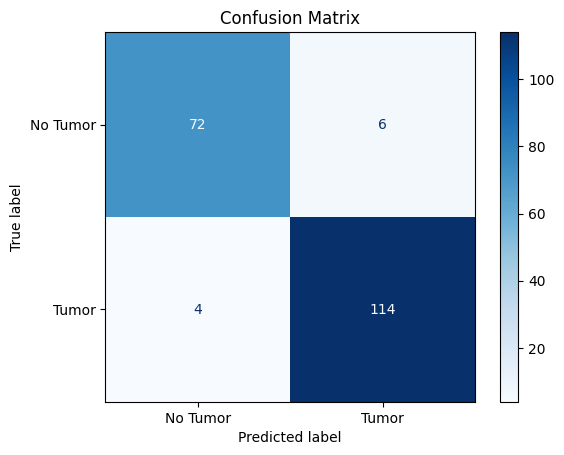

Confusion Matrix:
[[ 72   6]
 [  4 114]]


In [386]:
conf_matrix = confusion_matrix(y_true, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Tumor", "Tumor"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Print confusion matrix values
print("Confusion Matrix:")
print(conf_matrix)

In [387]:
# Load the image you want to test (example using OpenCV)
img = cv2.imread('test.jpg')
img = cv2.resize(img, (128, 128))

# Convert BGR to RGB
b, g, r = cv2.split(img)
img = cv2.merge([r, g, b])

# Reshape to (channels, height, width) and normalize
img = img.reshape((img.shape[2], img.shape[0], img.shape[1]))  # (3, 128, 128)
img = img / 255.0  # Normalize

# Convert to a PyTorch tensor and add batch dimension
img_tensor = torch.tensor(img, dtype=torch.float32).unsqueeze(0).to(device)


# Make prediction
with torch.no_grad():  # Disable gradient computation for inference
    output = model(img_tensor)
    prediction = (output >= 0.5).float()  # Apply a threshold (0.5) for binary classification

# Print the result
if prediction.item() == 1:
    print("Tumor detected")
else:
    print("No tumor detected")


Tumor detected
